# Clusteranalyse

In diesem Abschnitt wird der K-means Algorithmus zur Clusteranalyse, ein Beispiel für unsupervised learning, behandelt.
Als Beispiel dienen die Ergebnisse in den Mathematik- und Programmierklausuren des ersten Semsters.

In [15]:
import pandas as pd
%matplotlib inline
import matplotlib 
import numpy as np
import matplotlib.pyplot as plt

In [16]:
filepath = 'dhbw_noten.csv'

Die Daten liegen als .csv Datei vor, die erste Spalte enthält die Noten in Programmierung, die zweite die in Mathematik.


In [17]:
df = pd.read_csv(filepath, delimiter=';',  encoding='latin-1')
df = df.apply(lambda x: x.str.replace(",",".")).astype(float)
df.head()

,Note Prog. I,Note Mathe
0,1.0,2.8
1,1.0,2.9
2,1.1,4.7
3,1.2,1.9
4,1.2,2.0


Hier werden die Daten eines Jahrgangs untersucht, es sind 35 Datensätze.


In [18]:
df.describe()

,Note Prog. I,Note Mathe
count,35.000000,35.000000
mean,2.882857,3.525714
std,1.308903,1.122849
min,1.000000,1.000000
25%,1.400000,2.800000
50%,2.900000,4.000000
75%,4.000000,4.500000
max,4.600000,5.000000


Um die Daten besser handhaben zu können, werden die x- und y- Werte getrennt.
*map* wendet die als ersten Parameter übergebene Funktion auf jedes Element der als zweiter Parameter übergebenen Collection an.

In [19]:
noten = (df.values, None)
val, dummy = noten
x = map(lambda x: x[0],val)
y = map(lambda x: x[1],val)

Zunächst eine Übersicht über die Daten.
Grundsätzlich ist es sinnvoll, als ersten Schritt einer Analyse eine geeignete grafische Übersicht der Daten zu erzeugen.

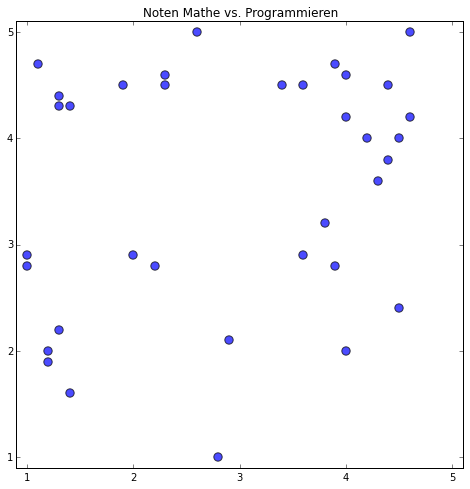

In [20]:
data = plt.figure(1,figsize=(8,8))
axes = plt.gca()
axes.set_xlim([0.9,5.1])
axes.set_ylim([0.9,5.1])
plt.scatter(x,y,s=70,alpha=0.7)
plt.title("Noten Mathe vs. Programmieren")
plt.show()

Man kann natürlich auch hier eine lineare Regression durchführen und hier (bei zwei Parametern) eine Ausgleichsgrade berechnen.


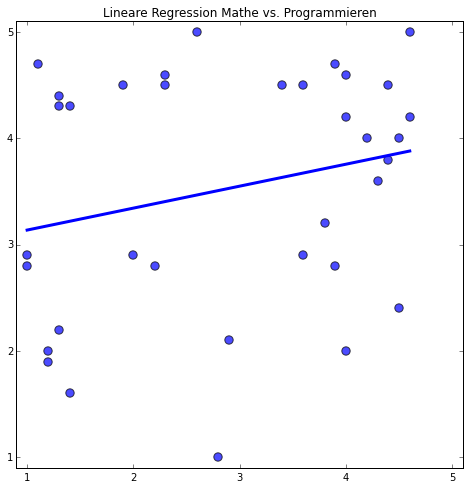

In [21]:
from sklearn.linear_model import LinearRegression
import numpy as np 
lm = LinearRegression()
xx = np.array(x).reshape(35,1)
yy = np.array(y).reshape(35,1)
lm.fit(xx,yy)

# print intercept and coefficients
#print lm.intercept_
#print lm.coef_

data = plt.figure(1,figsize=(8,8))
axes = plt.gca()
axes.set_xlim([0.9,5.1])
axes.set_ylim([0.9,5.1])
plt.scatter(x,y,s=70,alpha=0.7)
plt.title("Lineare Regression Mathe vs. Programmieren")
plt.plot(x,lm.predict(xx),color='blue',
         linewidth=3)
plt.show()

In [22]:
import matplotlib.cm as cm

from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler


K means bestimmt die Zentren von k Clustern so, dass die zugehörigen Punkte einen möglichst geringen Abstand vom jeweiligen Zentrum haben,das heisst, das Zentrum entspricht dem Mittelwert der zugehörigen Punkte (daher means)
Ein Punkt wird dem Cluster zugeordnet, dessen Zentrum er am nächsten liegt.
Eine Visualisierung des Ablaufs gibt's hier: http://www.naftaliharris.com/blog/visualizing-k-means-clustering/

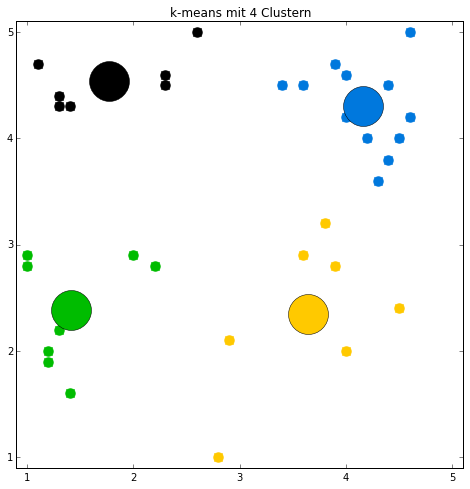

In [23]:
cluster_count = 4
km = cluster.KMeans(cluster_count)
pred=km.fit_predict(val,y)

fig = plt.figure(1,figsize=(8,8))
axes = plt.gca()
axes.set_xlim([0.9,5.1])
axes.set_ylim([0.9,5.1])
for k in range(cluster_count):
    my_members = km.labels_ == k
    xp = np.array(x)[my_members]
    yp = np.array(y)[my_members]
    color = cm.spectral(float(k) / cluster_count, 1)
    plt.plot(xp, yp, 'o', marker='.', c=color,markersize=20)
    cluster_center = km.cluster_centers_[k]
    plt.plot(cluster_center[0], cluster_center[1], 'o',
             markerfacecolor=color, markeredgecolor='k', markersize=40)
    plt.title("k-means mit 4 Clustern")


plt.show()